### 1. Import usefull libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### 2. Import data

In [2]:
df_train = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv',sep=',')
df_test = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv',sep=',')

### 3. Train Data Frame

#### a). Displaying data frame

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### b). Data frame shape

In [4]:
df_train.shape

(8523, 12)

#### d) Data frame describe

In [5]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##### Observation :
* 5 out of 12 column contain only numerical data rest column may be categorical.
* From count i can see 'Item_Weight' contain null value.
* 'Item_Weight' : Min-4.555000 Max-21.350000
* 'Item_Visibility' : Min-0.000000 Max-0.328391
* 'Item_MRP' : Min-31.290000 Max-266.888400
* 'Outlet_Establishment_Year' : From-1985  To-2009
* 'Item_Outlet_Sales' : Min-33.290000 Max-13086.964800

##### Decision :
* Everything looks fine except 'Item_Visibility'. I try to deal with it.

#### d). Data frame info

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##### Outcome :
* There are total 12 columns.
* 'Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type' these 7 column are of object type.
* 'Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales' these 4 column are of float type.
* 'Outlet_Establishment_Year' this 1 column is of int type.
* Some column have null value.

#### d). Checking null value 

In [7]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##### Outcome :
* 'Item_Weight' has 1463 null values.
* 'Outlet_Size' has 2410 null values.

### 4. Visualize Data Distribution of numerical data type 

#### a). Separating all numerical data type from training data frame

In [8]:
df1 = df_train[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']]
df1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


#### b). Visualize using distplot

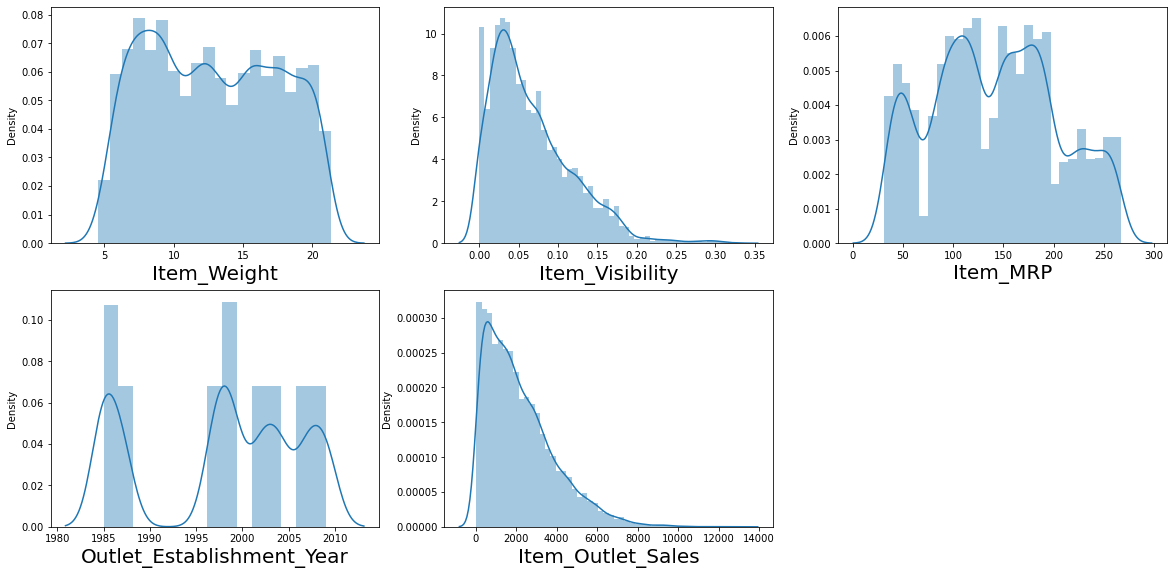

In [9]:
plt.figure(figsize=(20,20))
plot_number = 1
for i in df1:
    if plot_number<=5:
        ax = plt.subplot(4,3,plot_number)
        sns.distplot((df1[i]))
        plt.xlabel(i,fontsize = 20)
    plot_number+=1
plt.show()    

##### Outcome :
* 'Item_Outlet_Sales' is our target variable as per problem statement. It have some outlier's.
* 'Item_Weight','Item_MRP','Outlet_Establishment_Year' look like fine.
* 'Item_Visibility' look like some outlier's.

#### c). Using boxplot checking for outlier's

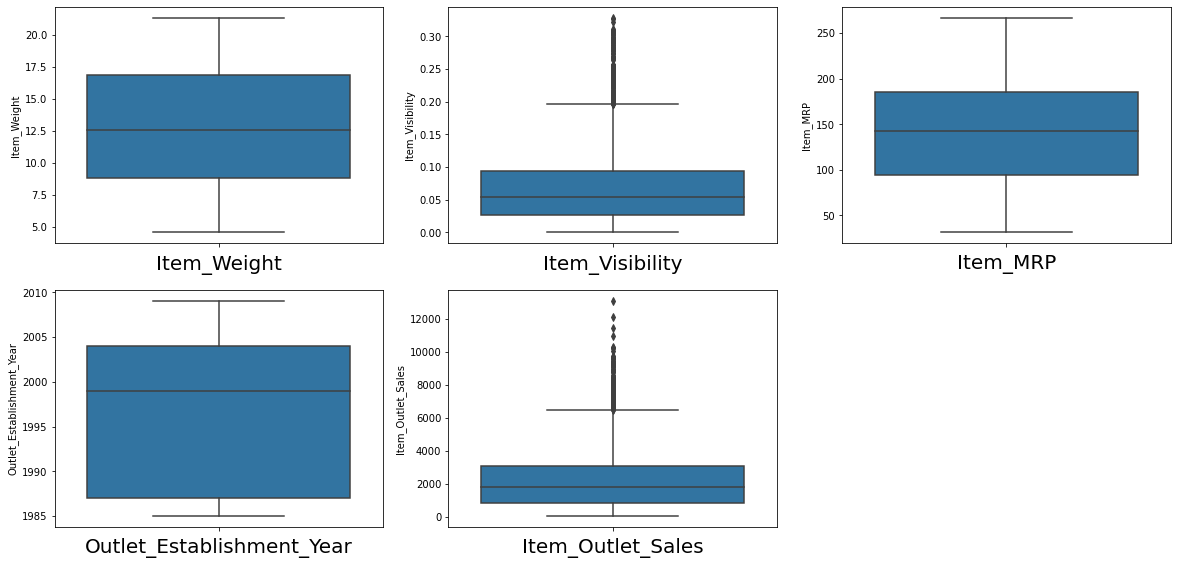

In [10]:
plt.figure(figsize=(20,20))
plot_number = 1
for i in df1:
    if plot_number<=5:
        ax = plt.subplot(4,3,plot_number)
        sns.boxplot(y=df1[i])
        plt.xlabel(i,fontsize = 20)
    plot_number+=1
plt.show()  

##### Outcome :
* 'Item_Outlet_Sales' is our target variable as per problem statement. So i no need to worry about it.
* 'Item_Weight','Item_MRP','Outlet_Establishment_Year' look like fine.
* 'Item_Visibility' look like lot of outlier's. I will deal with it in later part.

### 5. Visualize Data of categorical data type 

#### a). Visualize 'Item_Fat_Content' from training data frame using countplot

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

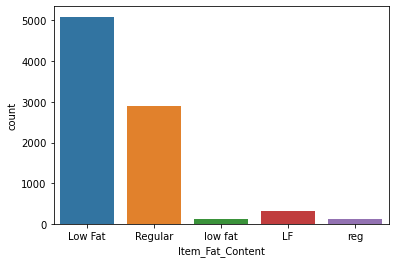

In [11]:
sns.countplot('Item_Fat_Content',data=df_train)

In [12]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

#### b). Visualize 'Item_Type' from training data frame using countplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

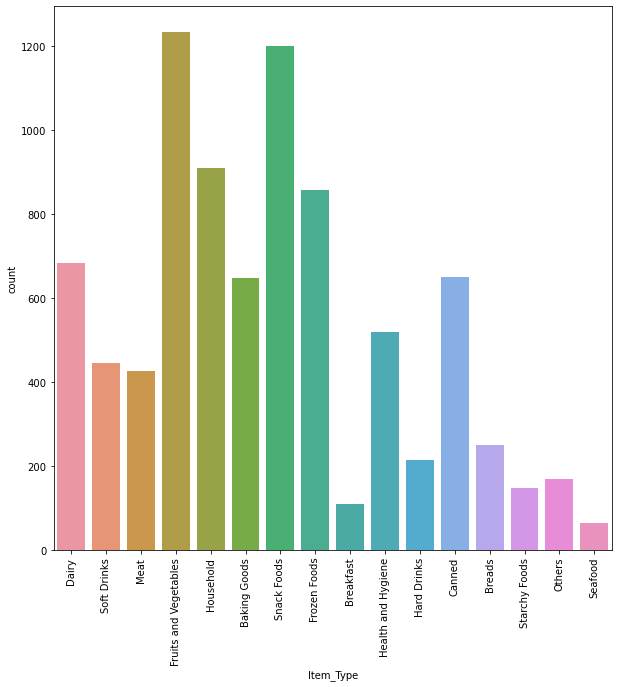

In [13]:
plt.figure(figsize=(10,10))
sns.countplot('Item_Type',data=df_train)
plt.xticks(rotation=90)

In [14]:
df_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

#### c). Visualize 'Outlet_Size' from training data frame using countplot

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

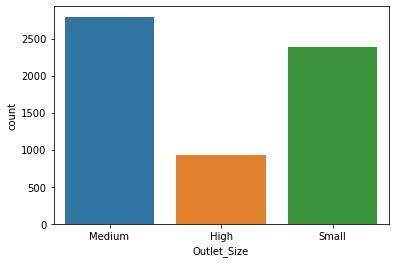

In [15]:
sns.countplot('Outlet_Size',data=df_train)

In [16]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

#### d). Visualize 'Outlet_Location_Type' from training data frame using countplot

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

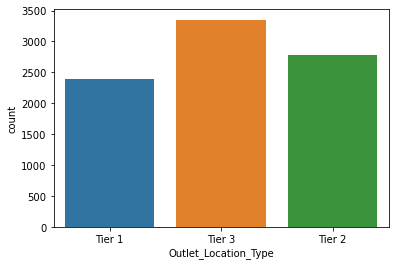

In [17]:
sns.countplot('Outlet_Location_Type',data=df_train)

In [18]:
df_train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

#### e). Visualize 'Outlet_Type' from training data frame using countplot

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

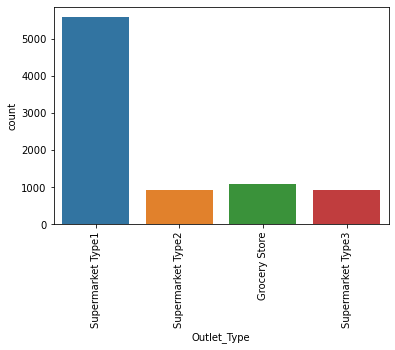

In [19]:
sns.countplot('Outlet_Type',data=df_train)
plt.xticks(rotation=90)

In [20]:
df_train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

### 6. Data Visualization with respect to target variable

#### a). Visualize 'Item_Weight' from training data frame to see the impact on using 'Item_Outlet_Sales'.

Text(0.5, 1.0, 'Impact of Item_Weight on Item_Outlet_Sales')

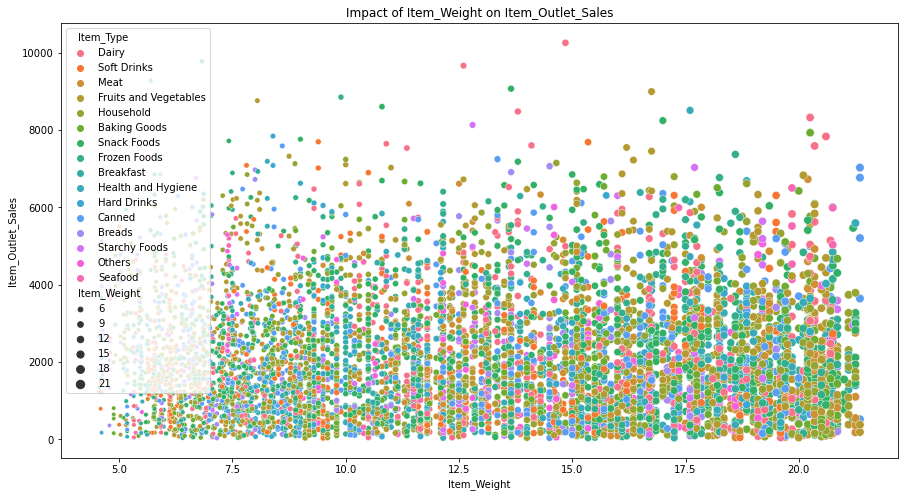

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=df_train)
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Item_Weight on Item_Outlet_Sales')

##### Outcome :
There is no positive trend i.e. it may be very less or neglable impact. 

#### b). Visualize 'Item_Visibility' from training data frame to see the impact on using 'Item_Outlet_Sales'.

Text(0.5, 1.0, 'Impact of Item_Visibility on Item_Outlet_Sales')

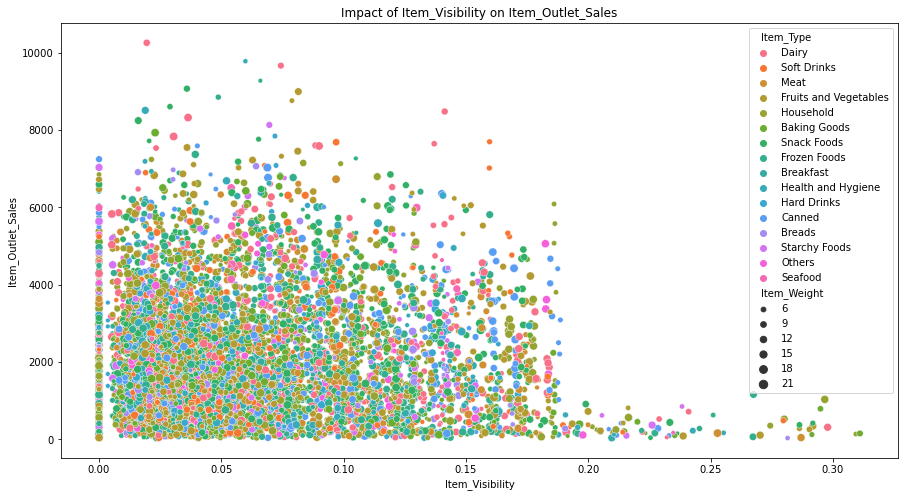

In [22]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=df_train)
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Item_Visibility on Item_Outlet_Sales')

##### Outcome :
There is no positive trend i.e. it may be very less or neglable impact. 

#### c). Visualize 'Item_MRP' from training data frame to see the impact on using 'Item_Outlet_Sales'.

Text(0.5, 1.0, 'Impact of Item_MRP on Item_Outlet_Sales')

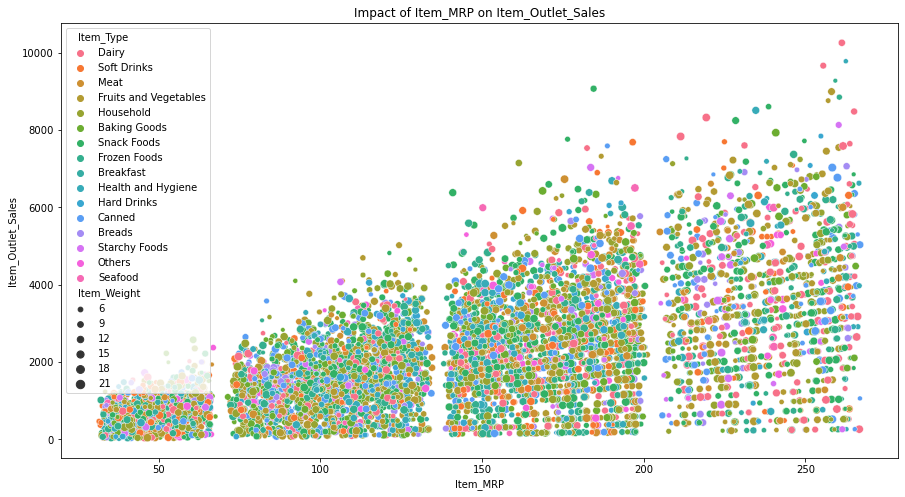

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=df_train)
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Item_MRP on Item_Outlet_Sales')

##### Outcome : 
* There is an positive trend i.e. it has impact on 'Item_Outlet_Sales'. 
* As i observed all 'Item_MRP' is distributed in four type of price scale. I am trying to observed that scale.

Text(0.5, 1.0, 'Impact of Item_MRP on Item_Outlet_Sales')

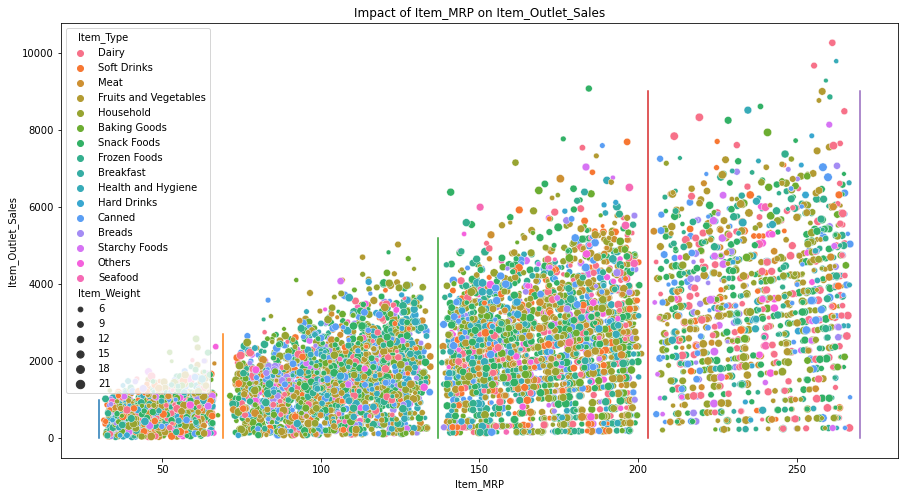

In [24]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=df_train)
plt.plot([30,30],[0,1000])
plt.plot([69,69],[0,2700])
plt.plot([137,137],[0,5200])
plt.plot([203,203],[0,9000])
plt.plot([270,270],[0,9000])
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Item_MRP on Item_Outlet_Sales')

##### Outcome : 
##### Scale or range are on X-axis are :
* 30 to 69
* 69 to 137
* 137 to 203
* 203 to 270
##### Scale or range are on Y-axis are :
* 1000
* 2700
* 5200
* 9000
* 9000
###### Note : I observed by hit & trial as there are only four category.

In [25]:
# Defining 'Item_MRP' with these category in data set by pandas 'cut' method 
df_train['Item_MRP'] = pd.cut(df_train['Item_MRP'],bins=[30,69,137,203,270],labels= ['a','b','c','d'])

In [26]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,d,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,a,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,c,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,c,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,a,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,d,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,b,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,b,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,b,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [27]:
df_train['Item_MRP'].value_counts()

c    3002
b    2751
d    1429
a    1341
Name: Item_MRP, dtype: int64

#### d). Visualize 'Outlet_Establishment_Year' from training data frame to see the impact on using 'Item_Outlet_Sales'.

Text(0.5, 1.0, 'Impact of Outlet_Establishment_Year on Item_Outlet_Sales')

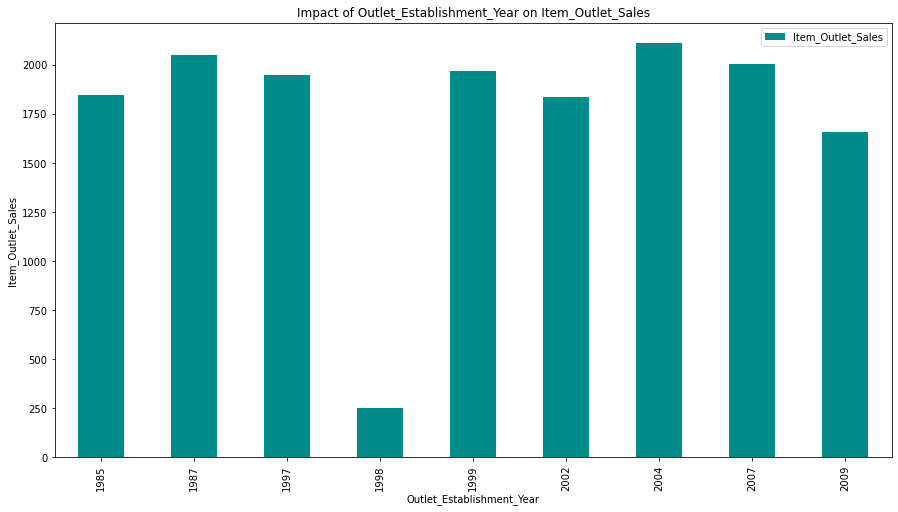

In [28]:
Outlet_Establishment_Year_pt = df_train.pivot_table(index='Outlet_Establishment_Year',values='Item_Outlet_Sales',aggfunc=np.median)

Outlet_Establishment_Year_pt.plot(kind = 'bar',figsize=(15,8),color='DarkCyan')
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Establishment_Year on Item_Outlet_Sales')

##### Outcome :
As it is 'Outlet_Establishment_Year' so there is no impact on sale

#### e). Visualize 'Item_Fat_Content' from training data frame to see the impact on using 'Item_Outlet_Sales'.

Text(0.5, 1.0, 'Impact of Item_Fat_Content on Item_Outlet_Sales')

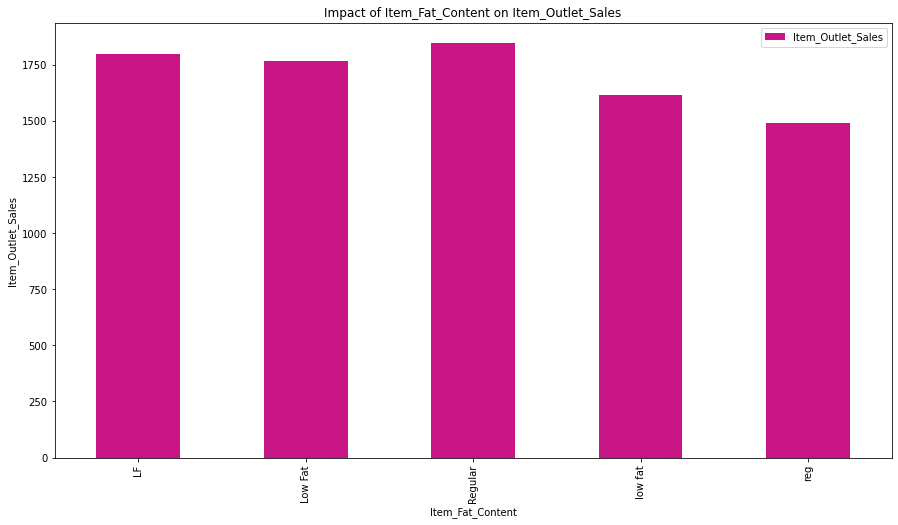

In [29]:
Item_Fat_Content_pt = df_train.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)

Item_Fat_Content_pt.plot(kind = 'bar',figsize=(15,8),color='MediumVioletRed')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Item_Fat_Content on Item_Outlet_Sales')

##### Outcome :
* As i observed there are two more values for Low fat:LF,low fat.
* As i observed there are one more values for Regular:reg.
* From the above plot it is clearly observed Low Fat item have much more impact on 'Item_Outlet_Sales'    

#### f). Visualize 'Item_Type' from training data frame to see the impact on using 'Item_Outlet_Sales'.

Text(0.5, 1.0, 'Impact of Item_Type on Item_Outlet_Sales')

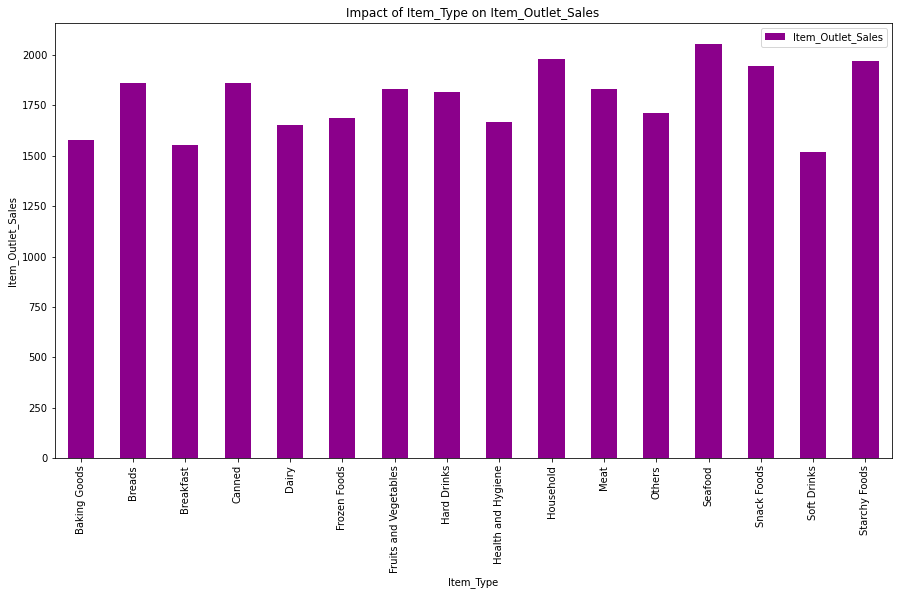

In [30]:
Item_Type_pt = df_train.pivot_table(index='Item_Type',values='Item_Outlet_Sales',aggfunc=np.median)

Item_Type_pt.plot(kind = 'bar',figsize=(15,8),color='DarkMagenta')
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Item_Type on Item_Outlet_Sales')

##### Outcome :
Seafood have highest impact on 'Item_Outlet_Sales'.

#### g). Visualize 'Outlet_Size' from training data frame to see the impact on using 'Item_Outlet_Sales'.

Text(0.5, 1.0, 'Impact of Outlet_Size on Item_Outlet_Sales')

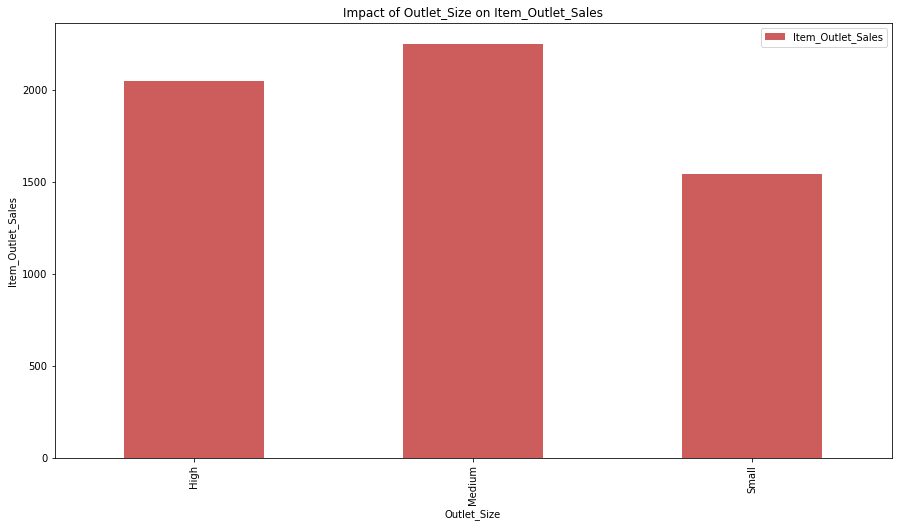

In [31]:
Outlet_Size_pt = df_train.pivot_table(index='Outlet_Size',values='Item_Outlet_Sales',aggfunc=np.median)

Outlet_Size_pt.plot(kind = 'bar',figsize=(15,8),color='IndianRed')
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Size on Item_Outlet_Sales')

##### Outcome :
Medium 'Outlet_Size' has highest impact on 'Item_Outlet_Sales'

#### h). Visualize 'Outlet_Location_Type' from training data frame to see the impact on using 'Item_Outlet_Sales'.

Text(0.5, 1.0, 'Impact of Outlet_Location_Type on Item_Outlet_Sales')

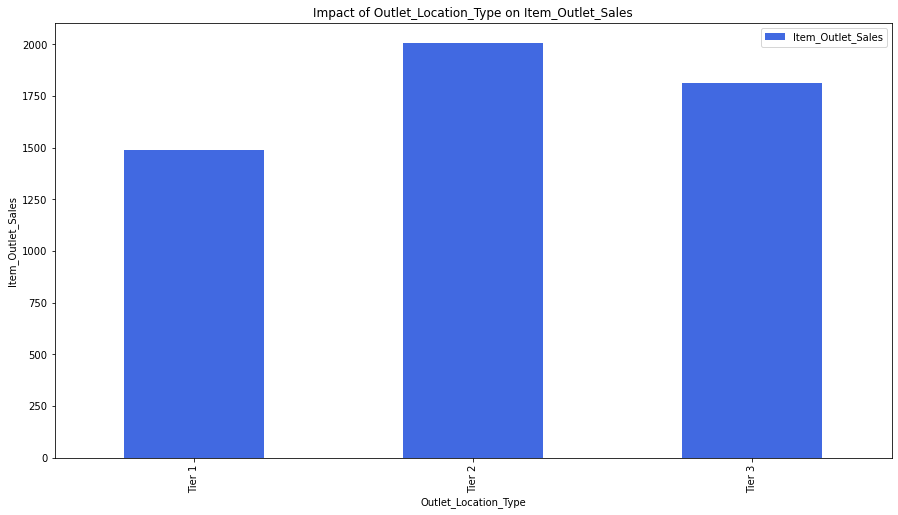

In [32]:
Outlet_Location_Type_pt = df_train.pivot_table(index='Outlet_Location_Type',values='Item_Outlet_Sales',aggfunc=np.median)

Outlet_Location_Type_pt.plot(kind = 'bar',figsize=(15,8),color='RoyalBlue')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Location_Type on Item_Outlet_Sales')

##### Outcome :
Tier 2 'Outlet_Location_Type' has highest impact on 'Item_Outlet_Sales'

#### i). Visualize 'Outlet_Type' from training data frame to see the impact on using 'Item_Outlet_Sales'.

Text(0.5, 1.0, 'Impact of Outlet_Type on Item_Outlet_Sales')

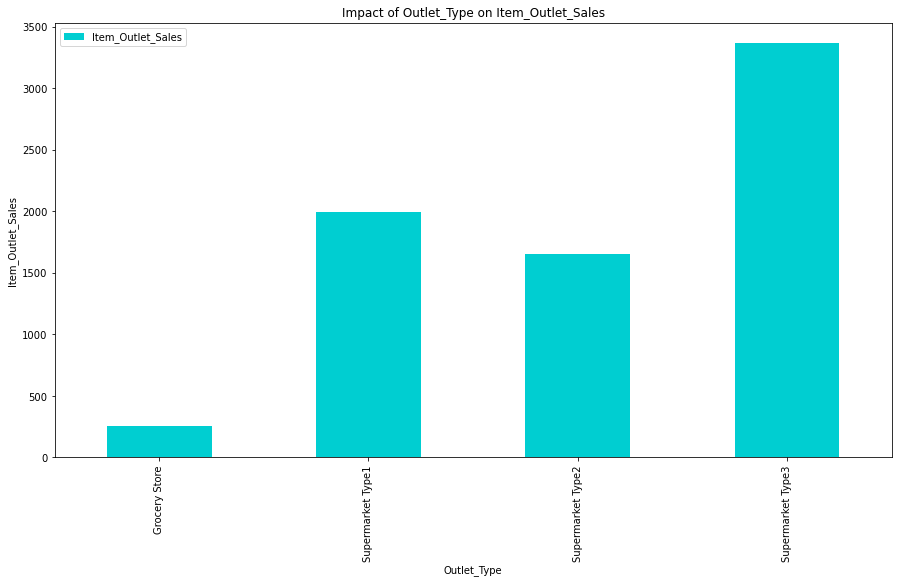

In [33]:
Outlet_Type_pt = df_train.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales',aggfunc=np.median)

Outlet_Type_pt.plot(kind = 'bar',figsize=(15,8),color='DarkTurquoise')
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Type on Item_Outlet_Sales')

##### Outcome : 
Supermarket Type 3 'Outlet_Type' has highest impact on 'Item_Outlet_Sales'

#### j). Visualize 'Outlet_Identifier' from training data frame to see the impact on using 'Item_Outlet_Sales'.

Text(0.5, 1.0, 'Impact of Outlet_Identifier on Item_Outlet_Sales')

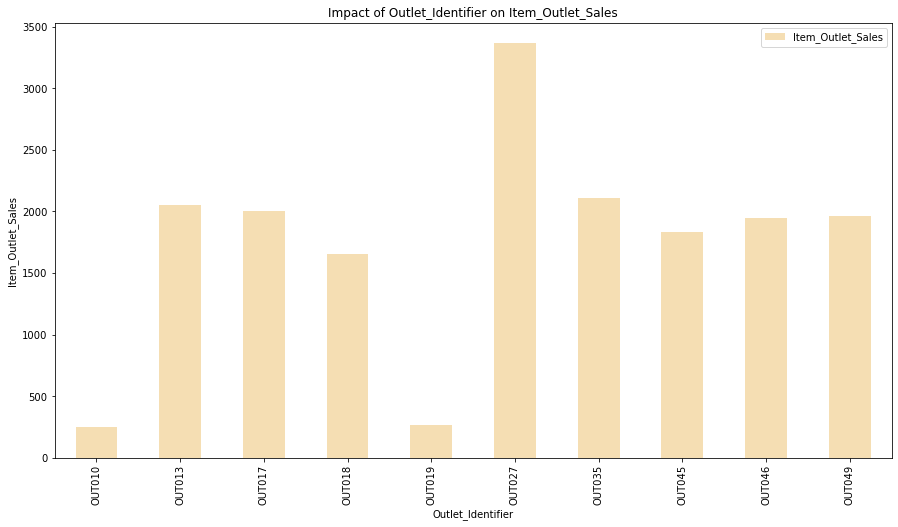

In [34]:
Outlet_Identifier_pt = df_train.pivot_table(index='Outlet_Identifier',values='Item_Outlet_Sales',aggfunc=np.median)

Outlet_Identifier_pt.plot(kind = 'bar',figsize=(15,8),color='Wheat')
plt.xlabel('Outlet_Identifier')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Identifier on Item_Outlet_Sales')

In [35]:
df_train.pivot_table(columns='Outlet_Identifier',values='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


##### Outcome : 
There are total 10 'Outlet_Identifier'. 2 out of 10 are 'Grocery Store',1 out of 10 is 'Supermarket Type2',1 out of 10 is 'Supermarket Type3' & 6 out of 10 is 'Supermarket Type1'.

### 7. Correlation matrix to see the coffecient of multicolinearity

#### a). Correlation matrix in form of Data Fram

In [36]:
df_train_corr = df_train.corr().abs()
df_train_corr

,Item_Weight,Item_Visibility,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,0.014048,0.011588,0.014123
Item_Visibility,0.014048,1.000000,0.074834,0.128625
Outlet_Establishment_Year,0.011588,0.074834,1.000000,0.049135
Item_Outlet_Sales,0.014123,0.128625,0.049135,1.000000


#### b). Visualize Correlation matrix using heatmap

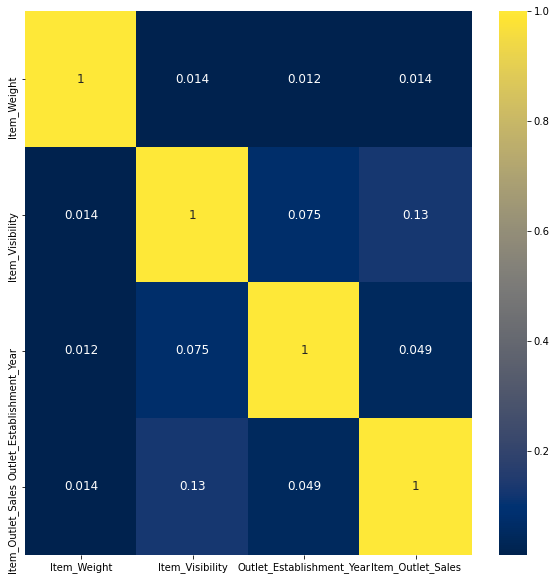

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train_corr,annot=True,annot_kws={'size':12},cmap='cividis')
plt.show()

##### Outcome :
* 'Item_MRP' has 57 percent correlation with target variable. Which can be consider as strong bond.
* 'Item_Visibility' has 13 percent correlation with target variable. Which can be consider as less bond.
* 'Outlet_Establishment_Year' has 4.9 percent correlation with target variable. Which can be consider as less bond as neglagable.
* 'Item_Weight' has 1.4 percent correlation with target variable. Which can be consider as less bond as neglagable.

### 8. Observing Test Data Frame

#### a). Displaying data frame

In [38]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


#### b). Shape of data frame

In [39]:
df_test.shape

(5681, 11)

#### c). Data frame info

In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


##### Outcome :
* There are total 11 columns.
* 'Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type' these 7 column are of object type.
* 'Item_Weight','Item_Visibility','Item_MRP' these 3 column are of float type.
* 'Outlet_Establishment_Year' this 1 column is of int type.
* Some column have null value.

#### d). Checking null value

In [41]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

##### Outcome :
* 'Item_Weight' has 976 null values.
* 'Outlet_Size' has 1606 null values.

#### * As i observed both data frame train & test have null value in 'Item_Weight' & 'Outlet_Size'.
#### * It is also observed that train has 12 column & test has 11 column.
#### * When i investigate i found 'Item_Outlet_Sales' is the column that is present in train & not present in test.
#### * As 'Item_Outlet_Sales' is our target variable so it is not present in test.

#### e). Checking the outlier's for test data

In [42]:
df2 = df_test[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]
df2

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750,0.007565,107.8622,1999
1,8.300,0.038428,87.3198,2007
2,14.600,0.099575,241.7538,1998
3,7.315,0.015388,155.0340,2007
4,NaN,0.118599,234.2300,1985
...,...,...,...,...
5676,10.500,0.013496,141.3154,1997
5677,7.600,0.142991,169.1448,2009
5678,10.000,0.073529,118.7440,2002
5679,15.300,0.000000,214.6218,2007


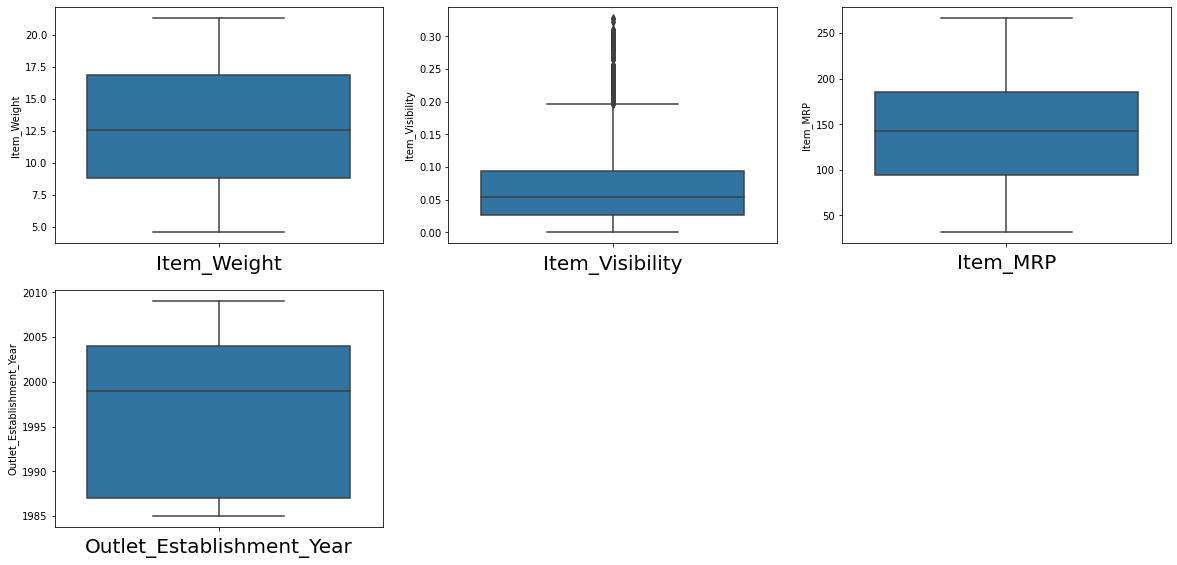

In [43]:
plt.figure(figsize=(20,20))
plot_number = 1
for i in df2:
    if plot_number<=5:
        ax = plt.subplot(4,3,plot_number)
        sns.boxplot(y=df1[i])
        plt.xlabel(i,fontsize = 20)
    plot_number+=1
plt.show()  

##### Outcome :
* There are some outlier's in 'Item_Visibility'

### 9. Data Preprocessing

##### Observation from both data set : 
* As i have null value in to column. 'Item_Weight','Outlet_Size' & 'Item_Outlet_Sales'. 
* 'Item_Outlet_Sales' is our target variable.
* 'Item_Weight' is float data type.
* 'Outlet_Size' is object data type.

##### Decision :
* No need to worry about 'Item_Outlet_Sales'.
* 'Item_Weight' i can deal null values by taking the mean,But 'Item_Weight' & 'Item_Visibility have neglable impact on sale so i am dropping these.
* 'Outlet_Size' i have three value 'High','Medium' & 'Small'.I can not deal with mean as it is categorical data.
* 'Outlet_Size' i have to find solution for it.

#### a). Droping 'Item_Weight' & 'Item_Visibility' from train data frame

In [44]:
df_train = df_train.drop(columns=['Item_Weight','Item_Visibility'])

In [45]:
df_train

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,Dairy,d,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,Soft Drinks,a,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,Meat,c,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,Fruits and Vegetables,c,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,Household,a,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,d,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,Regular,Baking Goods,b,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,Low Fat,Health and Hygiene,b,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,Regular,Snack Foods,b,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


#### b). Dealing with 'Item_Identifier'

In [46]:
df_train['Item_Identifier'].is_unique

False

In [47]:
df_train['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
DRN47     9
FDW49     9
FDF56     9
         ..
FDQ60     1
FDK57     1
FDY43     1
DRF48     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

##### Outcome : 'Item_Identifier' should be categorical

#### c). Dealing with 'Item_Fat_Content'

In [48]:
# Checking the value count for train data
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

##### Observation :
* As i observed there are two more values for Low fat:LF,low fat.
* As i observed there are one more values for Regular:reg.
    
##### Decision :
* Combined all extra value into their respective category

In [49]:
# Combining for train data
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [50]:
# Checking the value count for train data
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### d). Dealing with 'Item_Type'

In [51]:
df_train['Item_Type'].is_unique

False

In [52]:
df_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

##### Outcome : 'Item_Type' should be categorical

#### e). Dealing with 'Item_MRP'

In [53]:
df_train['Item_MRP'].value_counts()

c    3002
b    2751
d    1429
a    1341
Name: Item_MRP, dtype: int64

##### Outcome : As it is now categorical data & have strong correlation on target variable. It's look fine.

#### f). Dealing with 'Outlet_Size'

In [54]:
# Observing 'Outlet_Size'
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

##### Outcome : I can replace null value of 'Outlet_Size' by most frequently used value that is 'Medium'

In [55]:
#Dealing with 'Outlet_Size' null values of train data set
df_train['Outlet_Size'].fillna('Medium',inplace=True)

#### g). Final column for machine learning model

In [56]:
fc = ['Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']

In [57]:
df = df_train[fc]

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Type                  8523 non-null   object  
 1   Item_MRP                   8523 non-null   category
 2   Outlet_Identifier          8523 non-null   object  
 3   Outlet_Establishment_Year  8523 non-null   int64   
 4   Outlet_Size                8523 non-null   object  
 5   Outlet_Location_Type       8523 non-null   object  
 6   Outlet_Type                8523 non-null   object  
 7   Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(1), float64(1), int64(1), object(5)
memory usage: 474.7+ KB


In [59]:
#Checking null value again in train data frame
df.isnull().sum()

Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

##### Decision :
* 'Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type' should be categorical.                           

#### g). Converting the data type

In [60]:
df['Item_Type'] = df['Item_Type'].astype('category')
df['Outlet_Identifier'] = df['Outlet_Identifier'].astype('category')
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')
df['Outlet_Size'] = df['Outlet_Size'].astype('category')
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].astype('category')
df['Outlet_Type'] = df['Outlet_Type'].astype('category')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Type                  8523 non-null   category
 1   Item_MRP                   8523 non-null   category
 2   Outlet_Identifier          8523 non-null   category
 3   Outlet_Establishment_Year  8523 non-null   category
 4   Outlet_Size                8523 non-null   category
 5   Outlet_Location_Type       8523 non-null   category
 6   Outlet_Type                8523 non-null   category
 7   Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(7), float64(1)
memory usage: 127.0 KB


#### h). Checking for outlier's

<AxesSubplot:ylabel='Item_Outlet_Sales'>

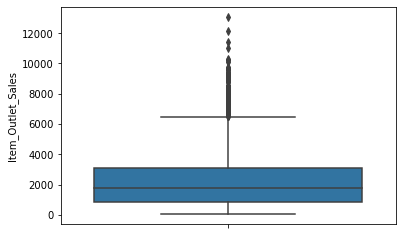

In [62]:
sns.boxplot(y=df['Item_Outlet_Sales'])

In [63]:
# finding the outliers

# 1st quantile
q1 = df.quantile(0.25) 

# 3rd quantile
q3 = df.quantile(0.75)

#IQR
iqr = q3-q1

### Outliers detection Formula
* Higher Side : Q3 + (1.5 * IQR)  
*  Lower Side  : Q1 - (1.5 * IQR)

In [64]:
# Deal with Item_Outlet_Sales outliers

# finding the High outliers
pre_high = q3.Item_Outlet_Sales + (1.5 * iqr.Item_Outlet_Sales)
print('The Higher Outliers For Item_Outlet_Sales is :',pre_high)

# finding the index of these above the value
pre_high_index = np.where(df['Item_Outlet_Sales']>pre_high)
print('The index are :',pre_high_index)

# Drop these index from data frame
df = df.drop(df.index[pre_high_index])
print('Now the shape is :',df.shape)

# Reset the index
df.reset_index()


The Higher Outliers For Item_Outlet_Sales is : 6501.8699
The index are : (array([  43,  130,  132,  145,  203,  240,  243,  275,  276,  304,  333,
        373,  402,  424,  456,  472,  497,  640,  641,  661,  694,  753,
        809,  844,  915,  935,  991,  997, 1009, 1012, 1043, 1092, 1113,
       1127, 1138, 1254, 1393, 1450, 1506, 1565, 1601, 1611, 1627, 1650,
       1658, 1700, 1705, 1710, 1821, 1835, 1859, 1879, 1987, 1996, 1998,
       2109, 2216, 2238, 2293, 2516, 2528, 2535, 2589, 2615, 2680, 2687,
       2776, 2803, 2922, 3073, 3083, 3087, 3098, 3154, 3208, 3213, 3234,
       3255, 3286, 3400, 3407, 3494, 3584, 3590, 3667, 3670, 3709, 3720,
       3757, 3848, 3863, 3869, 3894, 3903, 4094, 4150, 4289, 4305, 4346,
       4349, 4410, 4468, 4598, 4676, 4681, 4699, 4772, 4888, 4891, 4913,
       4915, 4961, 4991, 5065, 5177, 5185, 5223, 5225, 5292, 5315, 5351,
       5416, 5463, 5474, 5494, 5500, 5550, 5558, 5619, 5752, 5775, 5799,
       5800, 5812, 5866, 5969, 5977, 6000, 6057, 6

,index,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,Dairy,d,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,Soft Drinks,a,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,Meat,c,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,Fruits and Vegetables,c,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,4,Household,a,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...
8332,8518,Snack Foods,d,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8333,8519,Baking Goods,b,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8334,8520,Health and Hygiene,b,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8335,8521,Snack Foods,b,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<AxesSubplot:ylabel='Item_Outlet_Sales'>

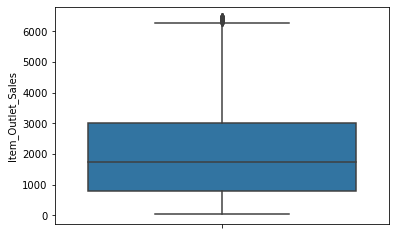

In [65]:
sns.boxplot(y=df['Item_Outlet_Sales'])

### 10. Transformation

##### Observation :
* 'Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Identifier' have categorical values.
* Machine learning model did not understand the string value.So i need to give some type of coding.
* I am using Label Encoding for these column.
* 'Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Establishment_Year' are the extra value for learning. I need to drop it.

In [66]:
label = df['Item_Outlet_Sales']
final_data = pd.get_dummies(df.iloc[:,1:7])

In [67]:
final_data['Item_Outlet_Sales'] = label

In [68]:
final_data.shape

(8337, 34)

### 11. Model Building 

#### a). Separating the independent variable in 'X' & dependent variable in 'y'

In [69]:
X = final_data.drop(columns='Item_Outlet_Sales')
y = final_data['Item_Outlet_Sales']

#### b). Split our data using 'train_test_split' split

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=341)

In [72]:
print('The shape of X-train :',X_train.shape)
print('The shape of y-train :',y_train.shape)
print('The shape of X-test :',X_test.shape)
print('The shape of X-test :',y_test.shape)

The shape of X-train : (5835, 33)
The shape of y-train : (5835,)
The shape of X-test : (2502, 33)
The shape of X-test : (2502,)


### 12. Initiate our model

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

#### a). Linear Regression Model

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_score = lr.score(X_train,y_train)*100
lr_score_pred = lr.score(X_test,y_test)*100
y_pred_lr = lr.predict(X_test)
mse=mean_squared_error(y_test,y_pred_lr)
lr_score=np.sqrt(mse)
print('The score by Linear Regression on train set is :',lr_score)
print('The score by Linear Regression on test set is :',lr_score_pred)
print('The MSE score is :',mse)
print('The RMSE score is :',lr_score)

The score by Linear Regression on train set is : 1022.8711082077581
The score by Linear Regression on test set is : 52.87691964009411
The MSE score is : 1046265.3040061672
The RMSE score is : 1022.8711082077581


#### Cross Validation on Linear Regression Model

In [76]:
score=cross_val_score(lr,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
lr_score_cross=np.sqrt(-score)
print('The cross validation score :',np.mean(lr_score_cross),np.std(lr_score_cross))

The cross validation score : 1024.663696449556 38.91835644080918


#### b). KNN Model

In [77]:
from sklearn.neighbors import KNeighborsRegressor

In [78]:
kn = KNeighborsRegressor()
kn.fit(X_train,y_train)
kn_score = kn.score(X_train,y_train)*100
kn_score_pred = kn.score(X_test,y_test)*100
y_pred_kn = kn.predict(X_test)
mse_kn=mean_squared_error(y_test,y_pred_kn)
kn_score=np.sqrt(mse_kn)
print('The score by  K-Neighbors Regressor on train set is :',kn_score)
print('The score by K-Neighbors Regressor on test set is :',kn_score_pred)
print('The MSE score is :',mse_kn)
print('The RMSE score is :',kn_score)

The score by  K-Neighbors Regressor on train set is : 1080.5086875117559
The score by K-Neighbors Regressor on test set is : 47.416635047120806
The MSE score is : 1167499.0237883774
The RMSE score is : 1080.5086875117559


#### Cross Validation K-Neighbors Regressor

In [79]:
score=cross_val_score(kn,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
kn_score_cross=np.sqrt(-score)
print('The cross validation score :',np.mean(kn_score_cross),np.std(kn_score_cross))

The cross validation score : 1059.9165379642316 40.95977970611412


#### c). Decision Tree Model

In [80]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_score = dt.score(X_train,y_train)*100
dt_score_pred = dt.score(X_test,y_test)*100
y_pred_dt = dt.predict(X_test)
mse_dt=mean_squared_error(y_test,y_pred_dt)
dt_score=np.sqrt(mse_dt)
print('The score by  Decision TreeRegressor on train set is :',dt_score)
print('The score by  Decision TreeRegressor on test set is :',dt_score_pred)
print('The MSE score is :',mse_dt)
print('The RMSE score is :',dt_score)

The score by  Decision TreeRegressor on train set is : 982.7675740601779
The score by  Decision TreeRegressor on test set is : 56.49957644001975
The MSE score is : 965832.1046241273
The RMSE score is : 982.7675740601779


#### Cross Validation Decision Tree Regressor

In [82]:
score=cross_val_score(dt,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
dt_score_cross=np.sqrt(-score)
print('The cross validation score :',np.mean(dt_score_cross),np.std(dt_score_cross))

The cross validation score : 986.8570661016868 41.183439252490984


#### d). Random Forest Model

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_score = rf.score(X_train,y_train)*100
rf_score_pred = rf.score(X_test,y_test)*100
y_pred_rf = rf.predict(X_test)
mse_rf=mean_squared_error(y_test,y_pred_rf)
rf_score=np.sqrt(mse_rf)
print('The score by  Random Forest Regressor on train set is :',rf_score)
print('The score by  Random Forest Regressor on test set is :',rf_score_pred)
print('The MSE score is :',mse_rf)
print('The RMSE score is :',rf_score)

The score by  Random Forest Regressor on train set is : 983.1600819759905
The score by  Random Forest Regressor on test set is : 56.46482219967448
The MSE score is : 966603.7467910363
The RMSE score is : 983.1600819759905


#### Cross Validation Random Forest Regressor

In [85]:
score=cross_val_score(rf,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
rf_score_cross=np.sqrt(-score)
print('The cross validation score :',np.mean(rf_score_cross),np.std(rf_score_cross))

The cross validation score : 986.7460735685838 41.42321611114399


#### e). Support Vector Machine

In [86]:
from sklearn.svm import SVR

In [87]:
sr = SVR()
sr.fit(X_train,y_train)
sr_score = sr.score(X_train,y_train)*100
sr_score_pred = sr.score(X_test,y_test)*100
y_pred_sr = sr.predict(X_test)
mse_sr=mean_squared_error(y_test,y_pred_sr)
sr_score=np.sqrt(mse_sr)
print('The score by  Support Vector Machine Regressor on train set is :',sr_score)
print('The score by  Support Vector Machine Regressor on test set is :',sr_score_pred)
print('The MSE score is :',mse_sr)
print('The RMSE score is :',sr_score)

The score by  Support Vector Machine Regressor on train set is : 1434.7238330983346
The score by  Support Vector Machine Regressor on test set is : 7.289595984911723
The MSE score is : 2058432.4772603777
The RMSE score is : 1434.7238330983346


#### Cross Validation On Support Vector Machine Regressor

In [88]:
score=cross_val_score(sr,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
sr_score_cross=np.sqrt(-score)
print('The cross validation score :',np.mean(sr_score_cross),np.std(sr_score_cross))

The cross validation score : 1481.344207128426 57.95023992099372


#### f). Bagging Regressor

In [89]:
from sklearn.ensemble import BaggingRegressor

In [90]:
br = BaggingRegressor()
br.fit(X_train,y_train)
br_score = br.score(X_train,y_train)*100
br_score_pred = br.score(X_test,y_test)*100
y_pred_br = br.predict(X_test)
mse_br=mean_squared_error(y_test,y_pred_br)
br_score=np.sqrt(mse_br)
print('The score by  Bagging Regressor on train set is :',br_score)
print('The score by  Bagging Regressor on test set is :',br_score_pred)
print('The MSE score is :',mse_br)
print('The RMSE score is :',br_score)

The score by  Bagging Regressor on train set is : 983.4504590400609
The score by  Bagging Regressor on test set is : 56.43910210749263
The MSE score is : 967174.8053861065
The RMSE score is : 983.4504590400609


#### Cross Validation on Bagging Regressor

In [91]:
score=cross_val_score(br,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
br_score_cross=np.sqrt(-score)
print('The cross validation score :',np.mean(br_score_cross),np.std(br_score_cross))

The cross validation score : 987.3796715978149 40.80547753722131


#### g). Ada Boost Regressor 

In [92]:
from sklearn.ensemble import AdaBoostRegressor

In [93]:
ar = AdaBoostRegressor()
ar.fit(X_train,y_train)
ar_score = ar.score(X_train,y_train)*100
ar_score_pred = ar.score(X_test,y_test)*100
y_pred_ar = ar.predict(X_test)
mse_ar=mean_squared_error(y_test,y_pred_ar)
ar_score=np.sqrt(mse_ar)
print('The score by  Ada Boost Regressor on train set is :',ar_score)
print('The score by  Ada Boost Regressor on test set is :',ar_score_pred)
print('The MSE score is :',mse_ar)
print('The RMSE score is :',ar_score)

The score by  Ada Boost Regressor on train set is : 1008.9699982030438
The score by  Ada Boost Regressor on test set is : 54.14904839866408
The MSE score is : 1018020.4572738503
The RMSE score is : 1008.9699982030438


#### Corss Validation on Ada Boost Regressor

In [94]:
score=cross_val_score(ar,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
ar_score_cross=np.sqrt(-score)
print('The cross validation score :',np.mean(ar_score_cross),np.std(ar_score_cross))

The cross validation score : 1023.2969848555704 45.417559853640356


#### h). Gradient Boosting Regressor

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

In [96]:
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)
gr_score = gr.score(X_train,y_train)*100
gr_score_pred = gr.score(X_test,y_test)*100
y_pred_gr = gr.predict(X_test)
mse_gr=mean_squared_error(y_test,y_pred_gr)
gr_score=np.sqrt(mse_gr)
print('The score by  Gradient Boosting Regressor on train set is :',gr_score)
print('The score by  Gradient Boosting Regressor on test set is :',gr_score_pred)
print('The MSE score is :',mse_gr)
print('The RMSE score is :',gr_score)

The score by  Gradient Boosting Regressor on train set is : 982.4767132994326
The score by  Gradient Boosting Regressor on test set is : 56.525321477383514
The MSE score is : 965260.4921756554
The RMSE score is : 982.4767132994326


In [97]:
score=cross_val_score(gr,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
gr_score_cross=np.sqrt(-score)
print('The cross validation score :',np.mean(gr_score_cross),np.std(gr_score_cross))

The cross validation score : 986.3885096321886 40.99314701415945


#### i). XGB Boost

In [98]:
import xgboost as xb

In [99]:
xr = xb.XGBRegressor()
xr.fit(X_train,y_train)
xr_score = xr.score(X_train,y_train)*100
xr_score_pred = xr.score(X_test,y_test)*100
y_pred_xr = xr.predict(X_test)
mse_xr=mean_squared_error(y_test,y_pred_xr)
xr_score=np.sqrt(mse_xr)
print('The score by  XGB Boost Regressor on train set is :',xr_score)
print('The score by  XGB Boost Regressor on test set is :',xr_score_pred)
print('The MSE score is :',mse_xr)
print('The RMSE score is :',xr_score)

The score by  XGB Boost Regressor on train set is : 982.7675665736654
The score by  XGB Boost Regressor on test set is : 56.499577102773536
The MSE score is : 965832.0899091237
The RMSE score is : 982.7675665736654


In [100]:
score=cross_val_score(xr,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
xr_score_cross=np.sqrt(-score)
print('The cross validation score :',np.mean(xr_score_cross),np.std(xr_score_cross))


The cross validation score : 986.8570575301586 41.18343979172438


### 13. Observing the score

In [101]:
all_score = pd.DataFrame({})

In [102]:
all_score['Name Of Model'] = ['Linear Regression','K-Neighbors Regressor','Decision Tree Regressor','Random Forest Regressor','Support Vector Machine Regressor','Bagging Regressor','Ada Boost Regressor','Gradient Boosting Regressor','XGB Boost Regressor']

In [103]:
all_score

,Name Of Model
0,Linear Regression
1,K-Neighbors Regressor
2,Decision Tree Regressor
3,Random Forest Regressor
4,Support Vector Machine Regressor
5,Bagging Regressor
6,Ada Boost Regressor
7,Gradient Boosting Regressor
8,XGB Boost Regressor


In [104]:
all_score['RMSE'] = [lr_score,kn_score,dt_score,rf_score,sr_score,br_score,ar_score,gr_score,xr_score]

In [105]:
all_score

,Name Of Model,RMSE
0,Linear Regression,1022.871108
1,K-Neighbors Regressor,1080.508688
2,Decision Tree Regressor,982.767574
3,Random Forest Regressor,983.160082
4,Support Vector Machine Regressor,1434.723833
5,Bagging Regressor,983.450459
6,Ada Boost Regressor,1008.969998
7,Gradient Boosting Regressor,982.476713
8,XGB Boost Regressor,982.767567


In [106]:
all_score['CV Score'] = [np.mean(lr_score_cross),np.mean(kn_score_cross),np.mean(dt_score_cross),np.mean(rf_score_cross),np.mean(sr_score_cross),np.mean(br_score_cross),np.mean(ar_score_cross),np.mean(gr_score_cross),np.mean(xr_score_cross)]

In [107]:
all_score

,Name Of Model,RMSE,CV Score
0,Linear Regression,1022.871108,1024.663696
1,K-Neighbors Regressor,1080.508688,1059.916538
2,Decision Tree Regressor,982.767574,986.857066
3,Random Forest Regressor,983.160082,986.746074
4,Support Vector Machine Regressor,1434.723833,1481.344207
5,Bagging Regressor,983.450459,987.379672
6,Ada Boost Regressor,1008.969998,1023.296985
7,Gradient Boosting Regressor,982.476713,986.388510
8,XGB Boost Regressor,982.767567,986.857058


##### Outcome : From the above 'Gradient Boosting Regressor' perform well.

##### Conclusion : For this problem i am choosing 'Gradient Boosting Regressor'

### 14. Hyperparameter Tuning 

* As 'Gradient Boosting Regressor' is my model for this problem. So i am performing the hyperparameter tuning on this model only.

#### a). Hyperparameter tuning using GridSearch CV

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
gr = GradientBoostingRegressor(max_depth=7,n_estimators=200,learning_rate=0.1)
param=[{'min_samples_split':[5,9,13],'max_leaf_nodes':[3,5,7,9],'max_features':[8,10,15,18]}]
gs=GridSearchCV(gr,param,cv=5,scoring='neg_mean_squared_error')
gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=7, n_estimators=200),
             param_grid=[{'max_features': [8, 10, 15, 18],
                          'max_leaf_nodes': [3, 5, 7, 9],
                          'min_samples_split': [5, 9, 13]}],
             scoring='neg_mean_squared_error')

In [110]:
gs.best_estimator_

GradientBoostingRegressor(max_depth=7, max_features=8, max_leaf_nodes=5,
                          min_samples_split=5, n_estimators=200)

In [111]:
gr = gs.best_estimator_

#### b). Trianing our model again after hyper tuning parameter

In [112]:
features = pd.concat([X_train,X_test],axis=0,ignore_index=True)

In [113]:
label = pd.concat([y_train,y_test],axis=0,ignore_index=True)

In [114]:
gr.fit(features,label)

GradientBoostingRegressor(max_depth=7, max_features=8, max_leaf_nodes=5,
                          min_samples_split=5, n_estimators=200)

### 15. Test Data

In [115]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [116]:
df_test.shape

(5681, 11)

#### a). Data Processing

In [117]:
fc_test = ['Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [118]:
df_test_for = df_test[fc_test] 

In [119]:
df_test_for.head()

,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [120]:
df_test_for.shape

(5681, 7)

In [121]:
df_test_for.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Type                  5681 non-null   object 
 1   Item_MRP                   5681 non-null   float64
 2   Outlet_Identifier          5681 non-null   object 
 3   Outlet_Establishment_Year  5681 non-null   int64  
 4   Outlet_Size                4075 non-null   object 
 5   Outlet_Location_Type       5681 non-null   object 
 6   Outlet_Type                5681 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 310.8+ KB


#### b). Dealing with 'Item_MRP'

In [122]:
df_test_for['Item_MRP'] = pd.cut(df_test_for['Item_MRP'],bins=[30,69,137,203,270],labels= ['a','b','c','d'])

In [123]:
df_test_for

,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Snack Foods,b,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,Dairy,b,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,Others,d,OUT010,1998,NaN,Tier 3,Grocery Store
3,Snack Foods,c,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,Dairy,d,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...
5676,Snack Foods,c,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,Starchy Foods,c,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,Health and Hygiene,b,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,Canned,d,OUT017,2007,NaN,Tier 2,Supermarket Type1


#### c). Converting the data type as per requirement

In [124]:
df_test_for.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Type                  5681 non-null   object  
 1   Item_MRP                   5681 non-null   category
 2   Outlet_Identifier          5681 non-null   object  
 3   Outlet_Establishment_Year  5681 non-null   int64   
 4   Outlet_Size                4075 non-null   object  
 5   Outlet_Location_Type       5681 non-null   object  
 6   Outlet_Type                5681 non-null   object  
dtypes: category(1), int64(1), object(5)
memory usage: 272.2+ KB


In [125]:
df_test_for['Item_Type'] = df_test_for['Item_Type'].astype('category')
df_test_for['Outlet_Identifier'] = df_test_for['Outlet_Identifier'].astype('category')
df_test_for['Outlet_Establishment_Year'] = df_test_for['Outlet_Establishment_Year'].astype('category')
df_test_for['Outlet_Size'] = df_test_for['Outlet_Size'].astype('category')
df_test_for['Outlet_Location_Type'] = df_test_for['Outlet_Location_Type'].astype('category')
df_test_for['Outlet_Type'] = df_test_for['Outlet_Type'].astype('category')

In [126]:
df_test_for.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Type                  5681 non-null   category
 1   Item_MRP                   5681 non-null   category
 2   Outlet_Identifier          5681 non-null   category
 3   Outlet_Establishment_Year  5681 non-null   category
 4   Outlet_Size                4075 non-null   category
 5   Outlet_Location_Type       5681 non-null   category
 6   Outlet_Type                5681 non-null   category
dtypes: category(7)
memory usage: 41.0 KB


In [127]:
df_test_for.isnull().sum()

Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### d). Dealing null value present in 'Outlet_Size'

In [128]:
df_test_for['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [129]:
df_test_for['Outlet_Size'].fillna('Medium',inplace=True)

In [130]:
df_test_for.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Type                  5681 non-null   category
 1   Item_MRP                   5681 non-null   category
 2   Outlet_Identifier          5681 non-null   category
 3   Outlet_Establishment_Year  5681 non-null   category
 4   Outlet_Size                5681 non-null   category
 5   Outlet_Location_Type       5681 non-null   category
 6   Outlet_Type                5681 non-null   category
dtypes: category(7)
memory usage: 41.0 KB


In [131]:
df_test_for.isnull().sum()

Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#### e). Transform the data

In [132]:
final_test_data = pd.get_dummies(df_test_for.iloc[:,1:])

In [133]:
final_test_data.shape

(5681, 33)

In [134]:
final_test_data.head()

,Item_MRP_a,Item_MRP_b,Item_MRP_c,Item_MRP_d,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1


### 16. Predicting the price for test data by my ML Model

In [135]:
sales_prediction = gr.predict(final_test_data)

In [136]:
sales_prediction

array([1708.33469517, 1755.87255284,  652.00757763, ..., 1584.19809292,
       3691.6740647 , 1584.19809292])

In [137]:
sales_prediction.shape

(5681,)

In [138]:
test_sales = pd.DataFrame({'Sales Prediction':sales_prediction})

In [139]:
test_sales

,Sales Prediction
0,1708.334695
1,1755.872553
2,652.007578
3,2768.576034
4,4490.608941
...,...
5676,2679.184995
5677,2457.709626
5678,1584.198093
5679,3691.674065


In [140]:
test_data_final = pd.concat([df_test,test_sales],axis=1)

In [141]:
test_data_final

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Sales Prediction
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1708.334695
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1755.872553
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,652.007578
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2768.576034
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,4490.608941
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2679.184995
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2457.709626
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1584.198093
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,3691.674065


In [142]:
# Export result in csv
test_data_final.to_csv('Bigmart_Sales_Prediction_On_test.csv')

### 17. Saving the model

In [143]:
import pickle

In [145]:
final_result = 'Big Mart Sales Prediction.pickle'
pickle.dump(gr,open(final_result,'wb'))